In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [36]:
data=pd.read_csv("monthly_milk_production_1.csv")


In [40]:
data

,Date,Production,Year,Month
0,1962-01,589,1962,01
1,1962-02,561,1962,02
2,1962-03,640,1962,03
3,1962-04,656,1962,04
4,1962-05,727,1962,05
...,...,...,...,...
163,1975-08,858,1975,08
164,1975-09,817,1975,09
165,1975-10,827,1975,10
166,1975-11,797,1975,11


In [38]:
df=data

In [39]:
y_m=df['Date'].str.split('-',expand=True)
df[['Year','Month']]=y_m
df.drop('Date',axis=1)


,Production,Year,Month
0,589,1962,01
1,561,1962,02
2,640,1962,03
3,656,1962,04
4,727,1962,05
...,...,...,...
163,858,1975,08
164,817,1975,09
165,827,1975,10
166,797,1975,11


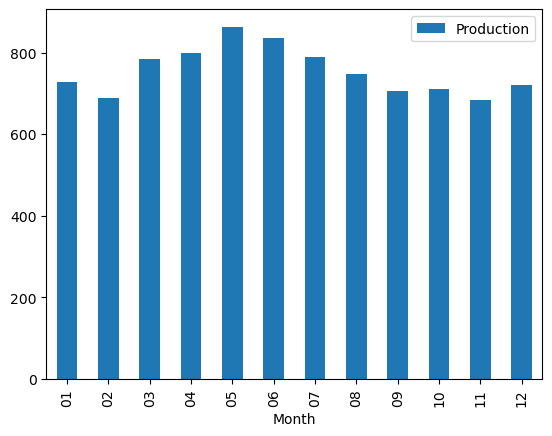

In [7]:
df[['Production','Month']].groupby('Month').mean().plot.bar()
plt.show()

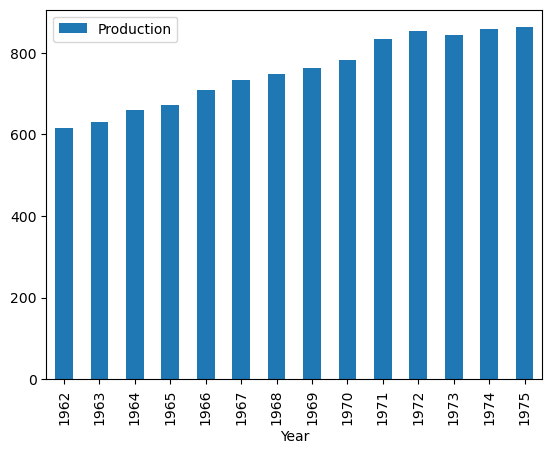

In [8]:
df[['Production','Year']].groupby('Year').mean().plot.bar()
plt.show()

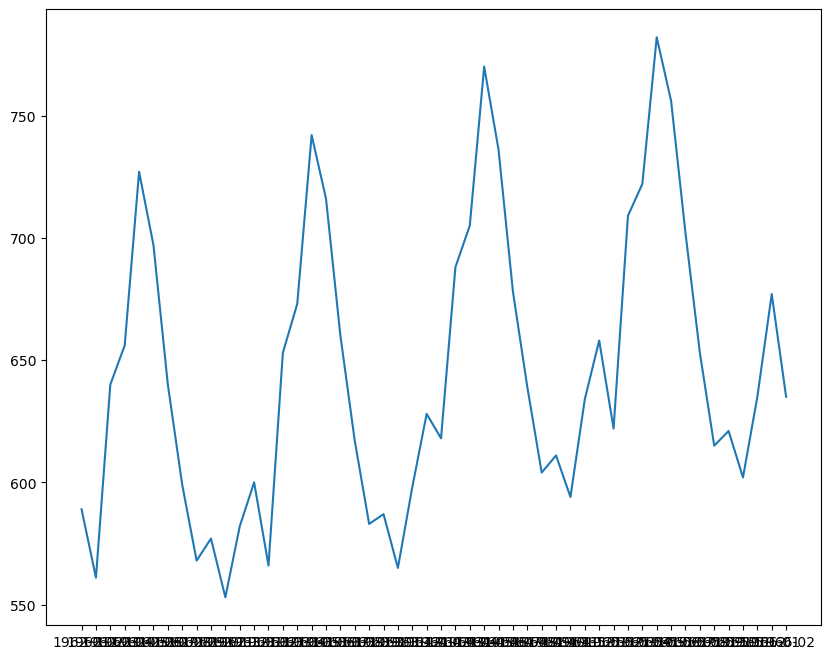

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(data['Date'].iloc[:50],data['Production'].iloc[:50])

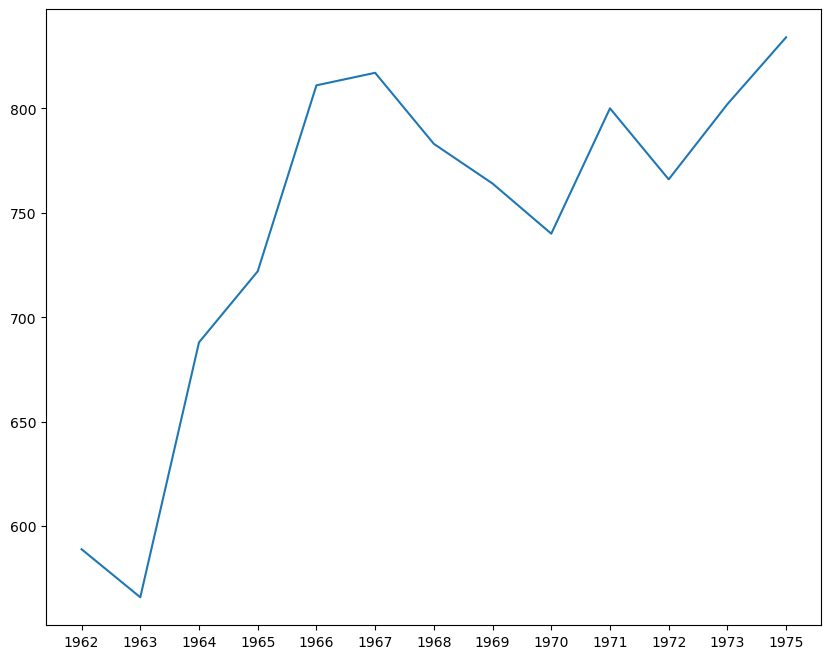

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(df['Year'].iloc[::13],df['Production'].iloc[::13])

In [11]:
split=int(len(data)*0.8)
split

134

In [12]:
train_data=data[:split]
test_data=data[split-1:]

In [13]:
train_data.shape

(134, 4)

In [14]:
test_data.shape

(35, 4)

In [15]:
dataset_train = train_data.Production.values 
dataset_train.shape

(134,)

In [16]:
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(134, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])


[[0.08823529]
 [0.01960784]
 [0.21323529]
 [0.25245098]
 [0.42647059]]


In [18]:

dataset_test = test_data.Production.values 
dataset_test = np.reshape(dataset_test, (-1,1)) 
scaled_test = scaler.fit_transform(dataset_test)  
print(scaled_test[:5])

[[0.06220096]
 [0.58851675]
 [0.66028708]
 [0.94258373]
 [0.784689  ]]


In [19]:
x_train=[]
y_train=[]
for i in range(0,len(scaled_train)-3):
    x_train.append(scaled_train[i:i+3])
    y_train.append(scaled_train[i+3])
    if i <=1:
        print(x_train)
        print(y_train)
        print()

[array([[0.08823529],
       [0.01960784],
       [0.21323529]])]
[array([0.25245098])]

[array([[0.08823529],
       [0.01960784],
       [0.21323529]]), array([[0.01960784],
       [0.21323529],
       [0.25245098]])]
[array([0.25245098]), array([0.42647059])]



In [20]:
x_test=[]
y_test=[]
for i in range(0,len(scaled_test)-3):
    x_test.append(scaled_test[i:i+3])
    y_test.append(scaled_test[i+3])


In [21]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape

(131, 3, 1)

In [22]:
x_train.shape

(131, 3, 1)

In [23]:
y_train.shape

(131, 1)

In [24]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [25]:
!pip install tensorflow

In [26]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [27]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))

regressorLSTM.add(LSTM(50, return_sequences = False))
# regressorLSTM.add(Dropout(0.2/))
# regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(x_train, 
				y_train, 
				batch_size = 1, 
				epochs = 20)
regressorLSTM.summary()


c:\Users\Yashvi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0156 - loss: 0.0634
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0059 - loss: 0.0255
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0032 - loss: 0.0240
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0112 - loss: 0.0264
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0182 - loss: 0.0257
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0096 - loss: 0.0301
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0233 - loss: 0.0231
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0021 - loss: 0.0183  
Epoch 9/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0360 - loss: 0.0213
Epoch 10/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0048 - loss: 0.0153
Epoch 11/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0329 - loss: 0.0154
Epoch 12/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [28]:
y_LSTM = regressorLSTM.predict(x_test)
# y_LSTM = regressorLSTM.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


In [29]:
y_LSTM_O = scaler.inverse_transform(y_LSTM)
y_LSTM_O

array([[904.3502 ],
       [944.34283],
       [904.5298 ],
       [855.3637 ],
       [825.5049 ],
       [790.04834],
       [794.63837],
       [779.61255],
       [802.47784],
       [833.72253],
       [795.58307],
       [871.74976],
       [907.8891 ],
       [955.31946],
       [924.81647],
       [875.3922 ],
       [845.94586],
       [810.54285],
       [810.9206 ],
       [788.6797 ],
       [811.5648 ],
       [839.5486 ],
       [797.8573 ],
       [874.5998 ],
       [908.4711 ],
       [951.6565 ],
       [914.99585],
       [865.97943],
       [840.5257 ],
       [813.8876 ],
       [824.28467],
       [807.87585]], dtype=float32)

Text(0.5, 1.0, 'LSTM')

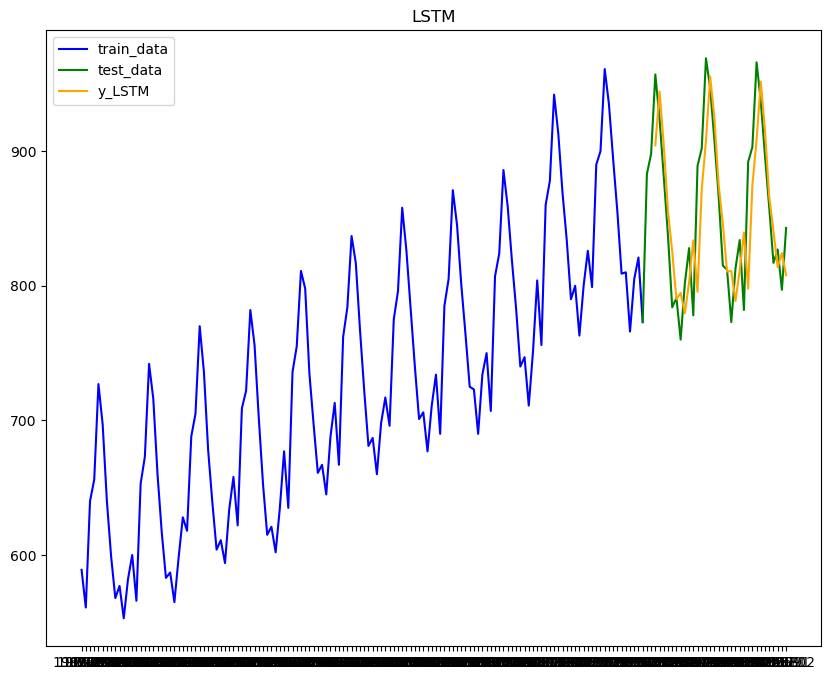

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(train_data.Date, train_data.Production, label = "train_data", color = "b")
plt.plot(test_data.Date, test_data.Production, label = "test_data", color = "g")
# plt.plot(train_data.Date[3:], y_LSTM_O, label = "y_LSTM", color = "orange")
plt.plot(test_data.Date[3:], y_LSTM_O, label = "y_LSTM", color = "orange")
plt.legend()
plt.title("LSTM")

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
# rmse = np.sqrt(mean_squared_error(y_train, y_LSTM_O))
rmse = np.sqrt(mean_squared_error(y_test, y_LSTM_O))
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_LSTM)
# r2 = r2_score(y_train, y_LSTM)
print(f"R2 score is {r2}")

Root Mean Squared Error (RMSE): 853.3997661863658
R2 score is 0.5964486367686979


In [32]:
data["Production"].min()


553

In [33]:
data["Production"].max()

969

In [34]:
data

,Date,Production,Year,Month
0,1962-01,589,1962,01
1,1962-02,561,1962,02
2,1962-03,640,1962,03
3,1962-04,656,1962,04
4,1962-05,727,1962,05
...,...,...,...,...
163,1975-08,858,1975,08
164,1975-09,817,1975,09
165,1975-10,827,1975,10
166,1975-11,797,1975,11


In [42]:
train_data

,Date,Production,Year,Month
0,1962-01,589,1962,01
1,1962-02,561,1962,02
2,1962-03,640,1962,03
3,1962-04,656,1962,04
4,1962-05,727,1962,05
...,...,...,...,...
129,1972-10,810,1972,10
130,1972-11,766,1972,11
131,1972-12,805,1972,12
132,1973-01,821,1973,01
